In [1]:
!pip install transformers
!pip install pyLDAvis
!pip install nltk
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Import required libraries, functions and classes

#Numpy and pandas for dataframes
import numpy as np
import pandas as pd

# nltk library for tokenization, lemmatizer, stopwords, pos tags and FreqDist
# import string for punctuation and str manipulations
import nltk
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
import string

#Gensim library for LDA model creation . Corpora in gensim to create the id2word Dictionary and corpus of terms
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

#visualization using matplotlib and pyLDAvis for the LDA model viz
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models

#import warnings to ignore deprecation warning
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from gensim.models import LdaModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

df = pd.read_excel('part-2.xlsx')

In [5]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [6]:
df1 = df[['Head Line', 'Review', 'Places', 'Destination']]
df1 = df1.dropna(how='all', inplace=False)
null_rows = df1.isnull().sum(axis=1)
print(null_rows)
df1 = df1[null_rows == 0]

0       0
1       0
2       0
3       0
4       0
       ..
6864    0
6865    0
6866    0
6867    0
6868    0
Length: 6869, dtype: int64


In [7]:
def preprocess_text(text):
  text = text.lower()
  text = text.replace('\n', ' ')
  text = text.replace('_x000d_', ' ')
  text = text.replace(',', ' ')
  text = text.replace('.', ' ')
  text = text.replace('?', ' ')
  text = text.replace('!', ' ')
  text = text.replace(';', ' ')
  text = text.replace(':', ' ')
  text = text.replace('(', ' ')
  text = text.replace(')', ' ')
  return text

df['Review'] = df['Review'].astype(str)
df['Review'] = df['Review'].apply(preprocess_text)
df1['Review']= df['Review'][df['Destination'] == 'Mysore']



In [10]:
reviews_df=df1[:100]

In [11]:
reviews_df.head()

,Head Line,Review,Places,Destination
0,"“Clean, inviting zoo with a wide range of anim...",this is an excellent zoo they have a number o...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore
1,“Better to visit in Morning or Evening”,size considerably large by normal walk it ta...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore
2,“Must visit place in mysore”,this is definitely the best zoo i hv visited i...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore
3,“Nice to visit”,we visited the zoo with a lot of expectations ...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore
4,"“Clean zoo, amazing animals .”",to know that this is not a govt run zoo is ama...,Sri Chamarajendra Zoological Gardens Mysore Zoo,Mysore


### Task 2: Normalize casings for the review text and extract the text into a list for easier manipulation

In [12]:
#  Normalize the text - reduce to lower case
review_list = [review.lower() for review in reviews_df["Review"]]
review_list[:5]

['this is an excellent zoo  they have a number of large cats  large mammals  and snakes  the zoo is quite large  so we took the electric car  this can get pricey if you are traveling in a group  however  it allows you to see the exhibits in a quick manner      no plastic bags or containers are allowed into the zoo  they will cut open your snack bags and place the snacks into a newspaper cone      parking is available directly across the street from the main entrance ',
 'size  considerably large  by normal walk it takes around to 45 mins in average to complete the tour    animals  monkeys  leopard  tiger  white tiger  lion  wild buffaloes  zebra  chimpanzee  deers  hippopotamus  rhinoceros  snakes  elephants  bear  etc  and lastly you can see the tall magnificent giraffes    birds  you can find many    visit time  ticket counter opens after 8 30 am   ticket price  adult  rs 60    note  plastic stuffs not allowed  they will put a sticker by paying rs 10 refundable    cleanliness  standa

### Task 3:Tokenize the reviews using NLTKs word_tokenize function.

In [13]:
# Tokenize the reviews

rev_words = [word_tokenize(review) for review in review_list]
print(rev_words[:5])

[['this', 'is', 'an', 'excellent', 'zoo', 'they', 'have', 'a', 'number', 'of', 'large', 'cats', 'large', 'mammals', 'and', 'snakes', 'the', 'zoo', 'is', 'quite', 'large', 'so', 'we', 'took', 'the', 'electric', 'car', 'this', 'can', 'get', 'pricey', 'if', 'you', 'are', 'traveling', 'in', 'a', 'group', 'however', 'it', 'allows', 'you', 'to', 'see', 'the', 'exhibits', 'in', 'a', 'quick', 'manner', 'no', 'plastic', 'bags', 'or', 'containers', 'are', 'allowed', 'into', 'the', 'zoo', 'they', 'will', 'cut', 'open', 'your', 'snack', 'bags', 'and', 'place', 'the', 'snacks', 'into', 'a', 'newspaper', 'cone', 'parking', 'is', 'available', 'directly', 'across', 'the', 'street', 'from', 'the', 'main', 'entrance'], ['size', 'considerably', 'large', 'by', 'normal', 'walk', 'it', 'takes', 'around', 'to', '45', 'mins', 'in', 'average', 'to', 'complete', 'the', 'tour', 'animals', 'monkeys', 'leopard', 'tiger', 'white', 'tiger', 'lion', 'wild', 'buffaloes', 'zebra', 'chimpanzee', 'deers', 'hippopotamus',

In [14]:
# POS tagging using NLTK pos tagger
pos_tagged_review = [pos_tag(review) for review in rev_words]
print(len(pos_tagged_review))
print(pos_tagged_review[:5])

100
[[('this', 'DT'), ('is', 'VBZ'), ('an', 'DT'), ('excellent', 'JJ'), ('zoo', 'NN'), ('they', 'PRP'), ('have', 'VBP'), ('a', 'DT'), ('number', 'NN'), ('of', 'IN'), ('large', 'JJ'), ('cats', 'NNS'), ('large', 'JJ'), ('mammals', 'NNS'), ('and', 'CC'), ('snakes', 'VBZ'), ('the', 'DT'), ('zoo', 'NN'), ('is', 'VBZ'), ('quite', 'RB'), ('large', 'JJ'), ('so', 'IN'), ('we', 'PRP'), ('took', 'VBD'), ('the', 'DT'), ('electric', 'JJ'), ('car', 'NN'), ('this', 'DT'), ('can', 'MD'), ('get', 'VB'), ('pricey', 'VB'), ('if', 'IN'), ('you', 'PRP'), ('are', 'VBP'), ('traveling', 'VBG'), ('in', 'IN'), ('a', 'DT'), ('group', 'NN'), ('however', 'RB'), ('it', 'PRP'), ('allows', 'VBZ'), ('you', 'PRP'), ('to', 'TO'), ('see', 'VB'), ('the', 'DT'), ('exhibits', 'NNS'), ('in', 'IN'), ('a', 'DT'), ('quick', 'JJ'), ('manner', 'NN'), ('no', 'DT'), ('plastic', 'NN'), ('bags', 'NNS'), ('or', 'CC'), ('containers', 'NNS'), ('are', 'VBP'), ('allowed', 'VBN'), ('into', 'IN'), ('the', 'DT'), ('zoo', 'NN'), ('they', 'PRP

In [15]:
nltk.help.upenn_tagset(tagpattern='NN*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [16]:
# Limit the data to only terms with noun tags

pos_noun_reviews = []
for review in pos_tagged_review:
    nouns=[]
    for word_tuple in review:
        if "NN" in word_tuple[1]:
            nouns.append(word_tuple)
    pos_noun_reviews.append(nouns)

print(pos_noun_reviews[:50])

[[('zoo', 'NN'), ('number', 'NN'), ('cats', 'NNS'), ('mammals', 'NNS'), ('zoo', 'NN'), ('car', 'NN'), ('group', 'NN'), ('exhibits', 'NNS'), ('manner', 'NN'), ('plastic', 'NN'), ('bags', 'NNS'), ('containers', 'NNS'), ('zoo', 'NN'), ('snack', 'NN'), ('bags', 'NNS'), ('place', 'NN'), ('snacks', 'NNS'), ('newspaper', 'NN'), ('cone', 'NN'), ('parking', 'NN'), ('street', 'NN'), ('entrance', 'NN')], [('size', 'NN'), ('walk', 'NN'), ('mins', 'NNS'), ('tour', 'NN'), ('animals', 'NNS'), ('tiger', 'NN'), ('lion', 'NN'), ('wild', 'NN'), ('buffaloes', 'NNS'), ('deers', 'NNS'), ('snakes', 'NNS'), ('elephants', 'NNS'), ('etc', 'NN'), ('magnificent', 'NN'), ('giraffes', 'NN'), ('visit', 'NN'), ('time', 'NN'), ('ticket', 'NN'), ('counter', 'NN'), ('price', 'NN'), ('adult', 'NN'), ('note', 'NN'), ('plastic', 'NN'), ('stuffs', 'NNS'), ('sticker', 'NN'), ('cleanliness', 'NN'), ('clean', 'NN'), ('peace', 'NN'), ('mind', 'NN')], [('zoo', 'NN'), ('i', 'NN'), ('animals', 'NNS'), ('n', 'NNS'), ('feel', 'NN'),

In [17]:
# Exclude any reviews that did not have any nouns as these reviews will be blank or empty sublists []

pos_noun_reviews=[review for review in pos_noun_reviews if len(review)>=1]
print(len(pos_noun_reviews), pos_noun_reviews[:50])

100 [[('zoo', 'NN'), ('number', 'NN'), ('cats', 'NNS'), ('mammals', 'NNS'), ('zoo', 'NN'), ('car', 'NN'), ('group', 'NN'), ('exhibits', 'NNS'), ('manner', 'NN'), ('plastic', 'NN'), ('bags', 'NNS'), ('containers', 'NNS'), ('zoo', 'NN'), ('snack', 'NN'), ('bags', 'NNS'), ('place', 'NN'), ('snacks', 'NNS'), ('newspaper', 'NN'), ('cone', 'NN'), ('parking', 'NN'), ('street', 'NN'), ('entrance', 'NN')], [('size', 'NN'), ('walk', 'NN'), ('mins', 'NNS'), ('tour', 'NN'), ('animals', 'NNS'), ('tiger', 'NN'), ('lion', 'NN'), ('wild', 'NN'), ('buffaloes', 'NNS'), ('deers', 'NNS'), ('snakes', 'NNS'), ('elephants', 'NNS'), ('etc', 'NN'), ('magnificent', 'NN'), ('giraffes', 'NN'), ('visit', 'NN'), ('time', 'NN'), ('ticket', 'NN'), ('counter', 'NN'), ('price', 'NN'), ('adult', 'NN'), ('note', 'NN'), ('plastic', 'NN'), ('stuffs', 'NNS'), ('sticker', 'NN'), ('cleanliness', 'NN'), ('clean', 'NN'), ('peace', 'NN'), ('mind', 'NN')], [('zoo', 'NN'), ('i', 'NN'), ('animals', 'NNS'), ('n', 'NNS'), ('feel', 'N

### Lemmatize

In [18]:
# Lemmatize the different forms of the nouns
# POS tags not passed to lemmatizer

wnl = WordNetLemmatizer()
lemmatized_words =[]
for review in pos_noun_reviews:
    lemma_word=[]
    for word in review:
        lemma_word.append(wnl.lemmatize(word[0]))
    lemmatized_words.append(lemma_word)

print(lemmatized_words[:50])

[['zoo', 'number', 'cat', 'mammal', 'zoo', 'car', 'group', 'exhibit', 'manner', 'plastic', 'bag', 'container', 'zoo', 'snack', 'bag', 'place', 'snack', 'newspaper', 'cone', 'parking', 'street', 'entrance'], ['size', 'walk', 'min', 'tour', 'animal', 'tiger', 'lion', 'wild', 'buffalo', 'deer', 'snake', 'elephant', 'etc', 'magnificent', 'giraffe', 'visit', 'time', 'ticket', 'counter', 'price', 'adult', 'note', 'plastic', 'stuff', 'sticker', 'cleanliness', 'clean', 'peace', 'mind'], ['zoo', 'i', 'animal', 'n', 'feel', 'sec', 'visit', 'management'], ['zoo', 'lot', 'expectation', 'mark', 'effect', 'jungle', 'safari', 'animal', 'zoo', 'wise', 'zoo', 'india', 'animal', 'kid'], ['govt', 'run', 'zoo', 'animal', 'enclosure', 'space', 'name', 'sponsor', 'front', 'enclosure', 'zoo', 'contribution', 'zoo', 'foul', 'smell', 'tree', 'sun', 'part', 'jungle', 'reality', 'zoo', 'center', 'town', 'variety', 'animal', 'corner', 'one', 'walk', 'km', 'king', 'jungle', 'lion', 'lioness', 'energy', 'giraffee',

### Remove Stop Words

In [19]:
# The o/p from lemmatizer still has many composite words that still contain emojis , special characters etc.
# Using tweet tokenizer for isolating them better.
tweet_tokenize = TweetTokenizer()

#Create list of stopwords with punctuations.Manually added token ['\s'] as this is usually seperated in tokenize
stop_words = stopwords.words("english")
stop_words = stop_words+list(string.punctuation)+["\'s"]

filtered_rev_words=[]

for review in lemmatized_words:
    filter_words=[]
    for words in review:
        rev_words = []
        rev_words = tweet_tokenize.tokenize(words)
        for word in rev_words:
            if word not in stop_words:
                filter_words.append(word)
    filtered_rev_words.append(filter_words)

In [20]:
# Exclude any reviews that contained only stopwords as these reviews will be blank or empty sublists []
filtered_rev_words=[review for review in filtered_rev_words if len(review)>=1]
print(len(filtered_rev_words),filtered_rev_words[:100])

100 [['zoo', 'number', 'cat', 'mammal', 'zoo', 'car', 'group', 'exhibit', 'manner', 'plastic', 'bag', 'container', 'zoo', 'snack', 'bag', 'place', 'snack', 'newspaper', 'cone', 'parking', 'street', 'entrance'], ['size', 'walk', 'min', 'tour', 'animal', 'tiger', 'lion', 'wild', 'buffalo', 'deer', 'snake', 'elephant', 'etc', 'magnificent', 'giraffe', 'visit', 'time', 'ticket', 'counter', 'price', 'adult', 'note', 'plastic', 'stuff', 'sticker', 'cleanliness', 'clean', 'peace', 'mind'], ['zoo', 'animal', 'n', 'feel', 'sec', 'visit', 'management'], ['zoo', 'lot', 'expectation', 'mark', 'effect', 'jungle', 'safari', 'animal', 'zoo', 'wise', 'zoo', 'india', 'animal', 'kid'], ['govt', 'run', 'zoo', 'animal', 'enclosure', 'space', 'name', 'sponsor', 'front', 'enclosure', 'zoo', 'contribution', 'zoo', 'foul', 'smell', 'tree', 'sun', 'part', 'jungle', 'reality', 'zoo', 'center', 'town', 'variety', 'animal', 'corner', 'one', 'walk', 'km', 'king', 'jungle', 'lion', 'lioness', 'energy', 'giraffee', 

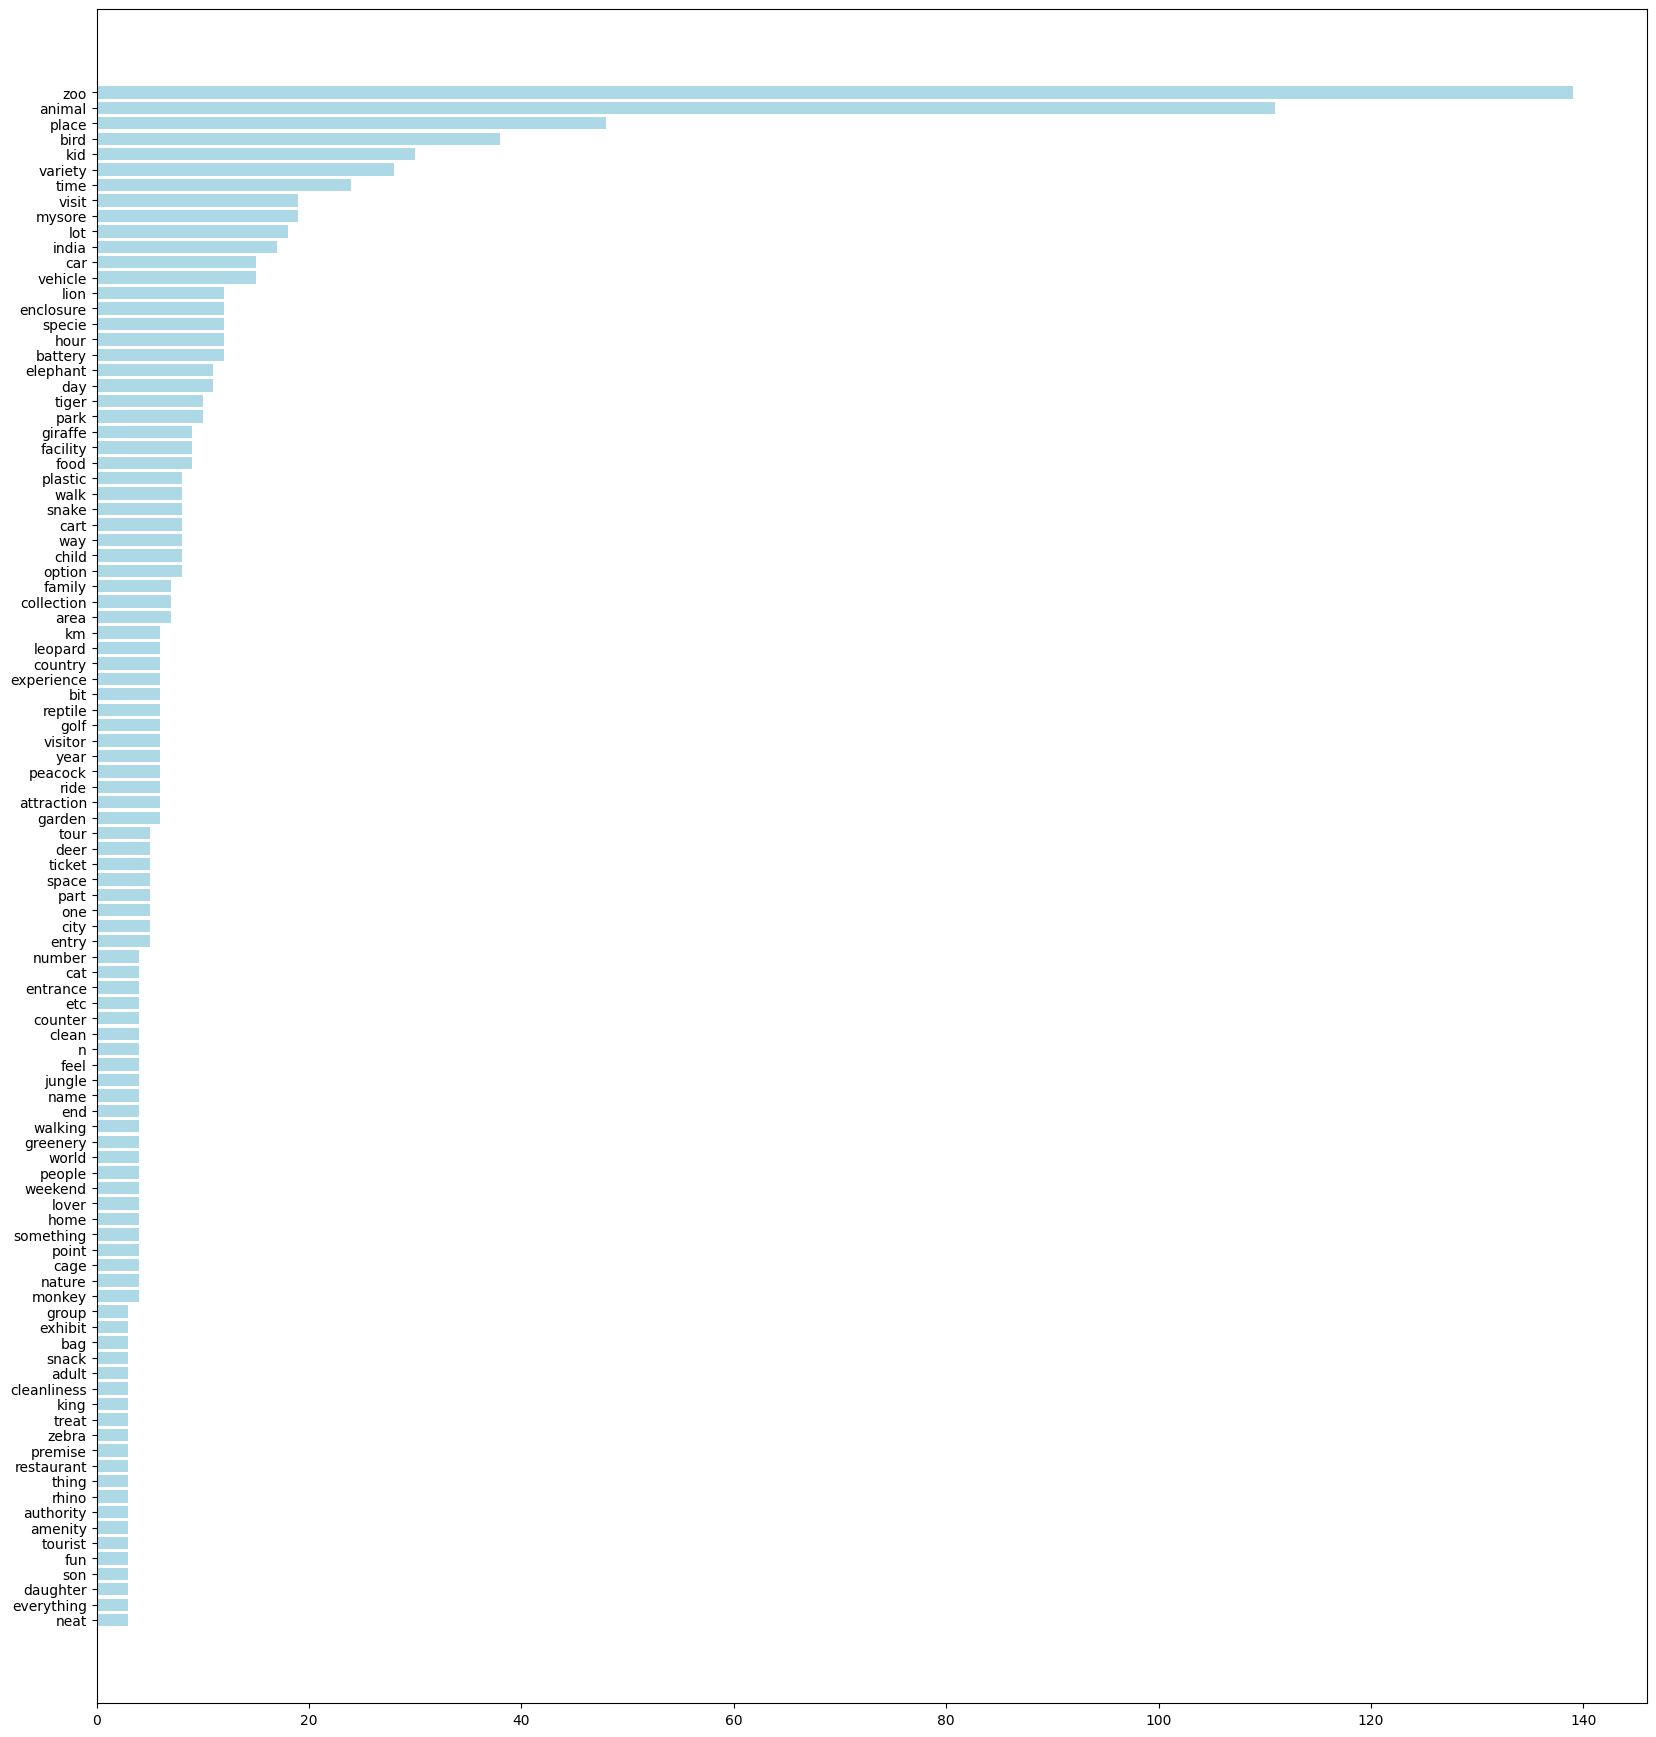

In [21]:
# Barplot to visualize the 100 most common words using FreqDist and barplots

list_of_words = [word for review in filtered_rev_words for word in review]
common_word_freq=FreqDist(list_of_words).most_common(100)
word_list = common_word_freq[::-1]

words,freq = [],[]
for word in word_list:
    words.append(word[0])
    freq.append(word[1])
x=np.array(words)
y=np.array(freq)

plt.figure(figsize=(20,22))
plt.barh(x,y,color="lightblue")
plt.show()

In [22]:
print(common_word_freq)

[('zoo', 139), ('animal', 111), ('place', 48), ('bird', 38), ('kid', 30), ('variety', 28), ('time', 24), ('visit', 19), ('mysore', 19), ('lot', 18), ('india', 17), ('car', 15), ('vehicle', 15), ('lion', 12), ('enclosure', 12), ('specie', 12), ('hour', 12), ('battery', 12), ('elephant', 11), ('day', 11), ('tiger', 10), ('park', 10), ('giraffe', 9), ('facility', 9), ('food', 9), ('plastic', 8), ('walk', 8), ('snake', 8), ('cart', 8), ('way', 8), ('child', 8), ('option', 8), ('family', 7), ('collection', 7), ('area', 7), ('km', 6), ('leopard', 6), ('country', 6), ('experience', 6), ('bit', 6), ('reptile', 6), ('golf', 6), ('visitor', 6), ('year', 6), ('peacock', 6), ('ride', 6), ('attraction', 6), ('garden', 6), ('tour', 5), ('deer', 5), ('ticket', 5), ('space', 5), ('part', 5), ('one', 5), ('city', 5), ('entry', 5), ('number', 4), ('cat', 4), ('entrance', 4), ('etc', 4), ('counter', 4), ('clean', 4), ('n', 4), ('feel', 4), ('jungle', 4), ('name', 4), ('end', 4), ('walking', 4), ('greener

In [23]:
# Revising the stopwords based of above analysis
stop_words_inclusions = ["...","..",'phone','good','bad','lenovo','k8','note','product',
                         'mobile','hai','please','pls','star','hi','ho','ok','superb','handset']
stop_words = stop_words + stop_words_inclusions


#isalnum() to remove emoji an isnumeric() to remove only number tokens present in the list
#len(word)!=1 will eliminate all one letter tokens such as 'u','i' etc.
final_rev_words = []
for review in filtered_rev_words:
    stopwords_removed_review=[]
    for word in review:
        if word not in stop_words and word.isalnum() and (not word.isnumeric()) and len(word)!=1:
            stopwords_removed_review.append(word)
    final_rev_words.append(stopwords_removed_review)

In [24]:
# Clearing any reviews which are now empty lists after removal of revised stop words
final_rev_words=[review for review in final_rev_words if len(review)>=1]
print(len(final_rev_words),final_rev_words[:50])

100 [['zoo', 'number', 'cat', 'mammal', 'zoo', 'car', 'group', 'exhibit', 'manner', 'plastic', 'bag', 'container', 'zoo', 'snack', 'bag', 'place', 'snack', 'newspaper', 'cone', 'parking', 'street', 'entrance'], ['size', 'walk', 'min', 'tour', 'animal', 'tiger', 'lion', 'wild', 'buffalo', 'deer', 'snake', 'elephant', 'etc', 'magnificent', 'giraffe', 'visit', 'time', 'ticket', 'counter', 'price', 'adult', 'plastic', 'stuff', 'sticker', 'cleanliness', 'clean', 'peace', 'mind'], ['zoo', 'animal', 'feel', 'sec', 'visit', 'management'], ['zoo', 'lot', 'expectation', 'mark', 'effect', 'jungle', 'safari', 'animal', 'zoo', 'wise', 'zoo', 'india', 'animal', 'kid'], ['govt', 'run', 'zoo', 'animal', 'enclosure', 'space', 'name', 'sponsor', 'front', 'enclosure', 'zoo', 'contribution', 'zoo', 'foul', 'smell', 'tree', 'sun', 'part', 'jungle', 'reality', 'zoo', 'center', 'town', 'variety', 'animal', 'corner', 'one', 'walk', 'km', 'king', 'jungle', 'lion', 'lioness', 'energy', 'giraffee', 'end', 'anima

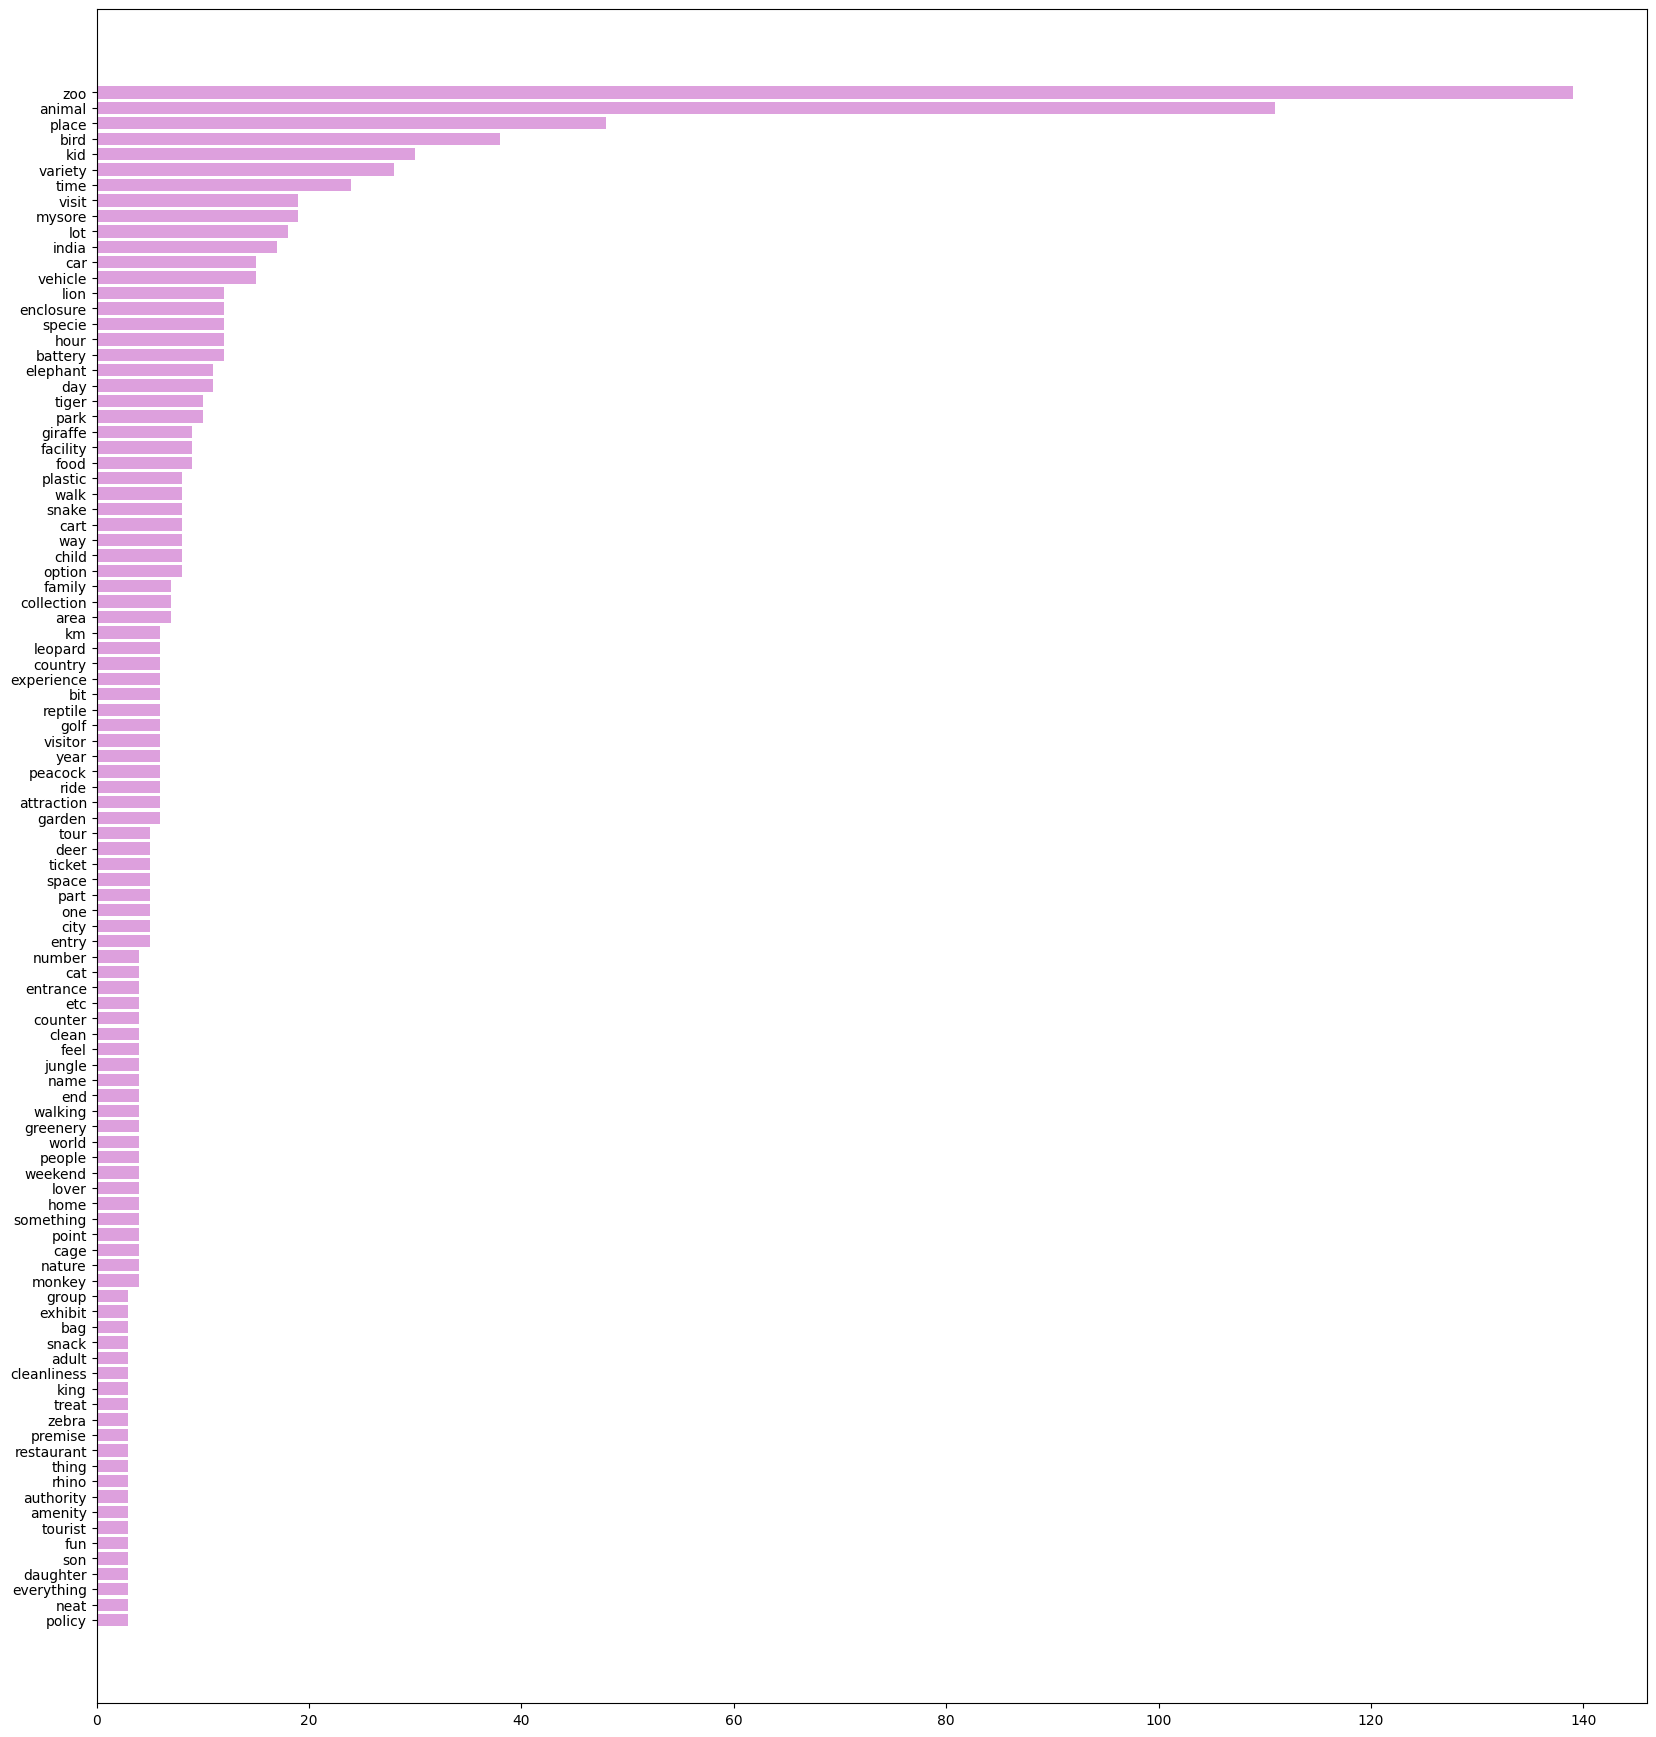

In [25]:
# Barplot to visualize the 100 most common words using FreqDist and barplots

list_of_words = [word for review in final_rev_words for word in review]
word_freq=FreqDist(list_of_words).most_common(100)
word_list_2 = word_freq[::-1]

words,freq = [],[]
for word in word_list_2:
    words.append(word[0])
    freq.append(word[1])
x=np.array(words)
y=np.array(freq)

plt.figure(figsize=(20,22))
plt.barh(x,y,color="plum")
plt.show()

### Task 8: Create a topic model using LDA on the cleaned-up data with 12 topics.

In [26]:
# First creating the id2word Dictionary and corpus of words required for the LDA topic model

id2word = corpora.Dictionary(final_rev_words)

corpus =[]
for review in final_rev_words:
    new = id2word.doc2bow(review)
    corpus.append(new)

print(corpus[:20],"\n")
print("No of reviews:",len(corpus),"\n")
print("No of unique words:",len(id2word),"\n")

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 3)], [(14, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)], [(17, 1), (19, 1), (42, 1), (45, 1), (46, 1), (47, 1)], [(17, 3), (19, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1)], [(17, 4), (19, 3), (28, 1), (43, 1), (51, 2), (57, 2), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1)], [(2, 1), (7, 1), (17, 2), (28, 1), (39, 1), (41, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (

In [117]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=47,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [118]:
lda_model.print_topics()

[(0,
  '0.032*"battery" + 0.029*"animal" + 0.027*"time" + 0.027*"car" + 0.025*"zoo" + 0.021*"park" + 0.021*"kid" + 0.020*"facility" + 0.014*"lot" + 0.012*"place"'),
 (1,
  '0.077*"zoo" + 0.064*"animal" + 0.027*"bird" + 0.021*"time" + 0.017*"variety" + 0.015*"place" + 0.014*"india" + 0.014*"mysore" + 0.012*"snake" + 0.011*"day"'),
 (2,
  '0.082*"animal" + 0.048*"zoo" + 0.025*"bird" + 0.021*"vehicle" + 0.020*"place" + 0.013*"child" + 0.012*"enclosure" + 0.012*"specie" + 0.011*"people" + 0.009*"variety"'),
 (3,
  '0.067*"zoo" + 0.048*"place" + 0.044*"animal" + 0.033*"kid" + 0.023*"bird" + 0.017*"lion" + 0.017*"tiger" + 0.015*"visit" + 0.013*"elephant" + 0.013*"variety"'),
 (4,
  '0.121*"zoo" + 0.054*"animal" + 0.027*"place" + 0.026*"variety" + 0.021*"india" + 0.017*"mysore" + 0.013*"food" + 0.011*"bird" + 0.011*"lot" + 0.010*"way"')]

In [127]:
# Top terms for each topic.

topics=[]
topic_terms=[]
for idx in range(5):
    topics.append("Topic "+ str(idx+1))
    terms=[]
    for term in lda_model.get_topic_terms(idx,topn=9):
        terms.append(id2word[term[0]])
    topic_terms.append(terms)

for idx in range(5):
    print(idx,topic_terms[idx])

0 ['battery', 'animal', 'time', 'car', 'zoo', 'park', 'kid', 'facility', 'lot']
1 ['zoo', 'animal', 'bird', 'time', 'variety', 'place', 'india', 'mysore', 'snake']
2 ['animal', 'zoo', 'bird', 'vehicle', 'place', 'child', 'enclosure', 'specie', 'people']
3 ['zoo', 'place', 'animal', 'kid', 'bird', 'lion', 'tiger', 'visit', 'elephant']
4 ['zoo', 'animal', 'place', 'variety', 'india', 'mysore', 'food', 'bird', 'lot']


In [128]:
df_topics = pd.DataFrame(topic_terms).transpose()
df_topics.columns = topics
df_topics

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,battery,zoo,animal,zoo,zoo
1,animal,animal,zoo,place,animal
2,time,bird,bird,animal,place
3,car,time,vehicle,kid,variety
4,zoo,variety,place,bird,india
5,park,place,child,lion,mysore
6,kid,india,enclosure,tiger,food
7,facility,mysore,specie,visit,bird
8,lot,snake,people,elephant,lot


In [129]:

import torch
from transformers import BertTokenizer, BertModel
model_name = 'bert-base-uncased'  # You can change this to any other BERT model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Function to get BERT embeddings for a text
def get_bert_embeddings(text):
    # Tokenize the input text and convert it to IDs
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    input_ids = torch.tensor(input_ids).unsqueeze(0)  # Add batch dimension

    # Forward pass through the BERT model
    with torch.no_grad():
        outputs = model(input_ids)
        # Get the embeddings for the [CLS] token (the first token)
        embeddings = outputs.last_hidden_state[:, 0, :].numpy()

    return embeddings

In [133]:
# Function to get BERT embeddings for a list of LDA topics
def get_bert_embeddings_for_topics(lda_topics):
    topic_embeddings = []
    for topic in lda_topics:
        # Convert the LDA topic terms to text
        topic_text = " ".join([id2word[term[0]] for term in topic])  # Convert term IDs to words
        # Get BERT embeddings for the topic text
        embeddings = get_bert_embeddings(topic_text)
        topic_embeddings.append(embeddings)
    return topic_embeddings

# Get LDA topics from the LDA model
lda_topics = [lda_model.get_topic_terms(topic_idx, topn=8) for topic_idx in range(5)]  # Adjust the number of topics

# Get BERT embeddings for the LDA topics
bert_embeddings_lda_topics = get_bert_embeddings_for_topics(lda_topics)


In [134]:
from sklearn.cluster import KMeans

# Number of clusters (you can adjust this)
num_clusters = 4

from sklearn.cluster import KMeans
import numpy as np

# Flatten the BERT embeddings
bert_embeddings_flat = np.array(bert_embeddings_lda_topics).reshape(len(bert_embeddings_lda_topics), -1)

# Perform K-Means clustering on flattened BERT embeddings
kmeans = KMeans(n_clusters=num_clusters, random_state=47)
kmeans.fit(bert_embeddings_flat)

# Get cluster assignments for each LDA topic
cluster_assignments = kmeans.labels_



C:\Users\nitin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [135]:
print(cluster_assignments)

[0 1 3 2 1]


In [136]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for K-Means clusters
silhouette_avg = silhouette_score(bert_embeddings_flat, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.14556604623794556


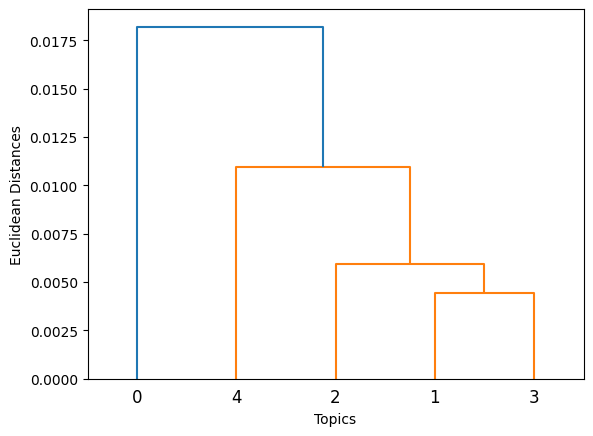

[3 1 1 1 2]


In [137]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

topic_term_matrix = lda_model.get_topics()  # Assuming you have this matrix
topic_similarity_matrix = np.dot(topic_term_matrix, topic_term_matrix.T)

# Perform hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(topic_similarity_matrix, method='ward'))

# Visualize the dendrogram (optional)
plt.xlabel('Topics')
plt.ylabel('Euclidean Distances')
plt.show()

# Cut the dendrogram to obtain 5 clusters/topics (adjust the threshold as needed)
num_clusters = 4
cluster_assignments = sch.fcluster(sch.linkage(topic_similarity_matrix, method='ward'), num_clusters, criterion='maxclust')

# Print cluster assignments
print(cluster_assignments)

In [138]:
# Re-run the LDA model with 5 topics (assuming you already reduced the topics)
lda_model_updated = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                   id2word=id2word,
                                                   num_topics=5,  
                                                   random_state=47,
                                                   update_every=1,
                                                   chunksize=100,
                                                   passes=10,
                                                   alpha="auto")

# Calculate the coherence score for the updated LDA model
from gensim.models import CoherenceModel

coherence_model_lda_updated = CoherenceModel(model=lda_model_updated, texts=final_rev_words, dictionary=id2word, coherence='c_v')
coherence_lda_updated = coherence_model_lda_updated.get_coherence()
print('\nUpdated Coherence Score: ', coherence_lda_updated)



Updated Coherence Score:  0.2920960334524092
